In [34]:
#載入套件
import cv2
import numpy as np
import pandas as pd
import datetime 
from matplotlib import pyplot as plt
%matplotlib inline

#自訂義函數
def CurveRecognize(Hue,Saturation,Value,GrayFlag,Image):
    HSV=cv2.cvtColor(Image,cv2.COLOR_BGR2HSV)
    
    LowerBound=np.array([Hue[0],Saturation[0],Value[0]])
    UpperBound=np.array([Hue[1],Saturation[1],Value[1]])
    mask=cv2.inRange(HSV,LowerBound,UpperBound)
    
    Curve=cv2.bitwise_and(Image,Image,mask=mask)
    if GrayFlag == 1:
        Curve=cv2.cvtColor(Curve,cv2.COLOR_BGR2GRAY)
        Curve=np.piecewise(Curve,[Curve<=0,Curve>0],[0,255])
        Curve=Curve.astype('uint8')
        return(Curve)
    else:
        return(mask)
    
def LockCurve(Image):
    Location=np.where(Image==255)
    return(
        Image[
            min(Location[0]):max(Location[0])+1,
            min(Location[1]):max(Location[1])+1
        ]
    )

def output(x,y,ROI):
    grid = int(ROI.shape[1]/x)
    output_y = []
    ya = y[0]
    yb = y[1]
    xa = 0
    xb = ROI.shape[0]
    for i in range(x):
        result = []
        for j in range(ROI.shape[0]):
            if ROI[j,i*grid] == 255:
                result.append(ROI.shape[0] - j)
        output_y.append(ya + (yb - ya)*(np.array(result).mean() - xa)/(xb - xa))
    return output_y

def smooth(Image, kernel, times):
    if times > kernel:
        times = kernel
    temp = cv2.dilate(Image, np.ones((kernel,kernel), np.uint8), iterations = 1)
    for i in range(times):
        temp = cv2.erode(temp, np.ones((int(kernel/times),int(kernel/times)), np.uint8), iterations = 1)
    return temp

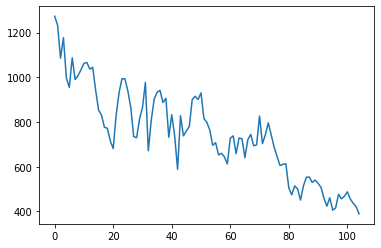

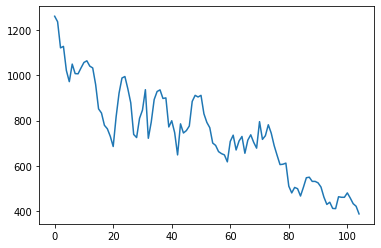

In [37]:
#讀取圖檔
Image=cv2.imread('C:\\python\\imone.png')

#定義綠色上下界
Hue=[35,77]
Saturation=[43,255]
Value=[46,255]

Filter=CurveRecognize(Hue, Saturation,Value,0,Image)
ROI=Filter[100:800,0:1830]
cv2.imshow('curve',ROI)
cv2.waitKey()
cv2.destroyAllWindows()

#找尋圖片上下界
ROI = LockCurve(ROI)
cv2.imshow('curve',ROI)
cv2.waitKey()
cv2.destroyAllWindows()

#未平滑繪製
y = output(105,[335.84,1275.84],ROI)
plt.plot([i for i in range(105)],y)
plt.show()

#將圖片膨脹縮小
ROI  = smooth(ROI, 20, 2)
cv2.imshow('curve',ROI)
cv2.waitKey()
cv2.destroyAllWindows()

#平滑繪製
y = output(105,[335.84,1275.84],ROI)
plt.plot([i for i in range(105)],y)
plt.show()

In [24]:
#加入雜質
dirty_y = np.array(y) + np.random.normal(loc=0.0, scale=1.0)
df = pd.DataFrame({'月營收':dirty_y})
df.to_csv('C:\\python\\data.csv')